In [1]:
import requests
import pandas as pd

# Step 1: Define the API endpoint and query
agg_url = "https://api.ooni.io/api/v1/aggregation"

params = {
    "axis_x": "probe_cc", 
    "axis_y": "category_code", 
    "since": "2017-01-01",
    "until": "2017-12-31",
    "test_name": "web_connectivity",
    "category_code": "HUMR"
}

# Step 2: Fetch data
response = requests.get(agg_url, params=params)
data = response.json()

# Step 3: Convert to DataFrame
results = data.get("result", [])
df = pd.DataFrame(results)

# Step 4: Filter for confirmed blocks
confirmed_df = df[df["confirmed_count"] > 0].copy()

# Step 5: Sort results by confirmed_count
confirmed_df = confirmed_df.sort_values(by="confirmed_count", ascending=False)

# Display results
print(confirmed_df)


    anomaly_count category_code  confirmed_count  failure_count  \
82           2476          HUMR             1835              1   
37            151          HUMR              324             14   
76             95          HUMR              193            161   
51            751          HUMR               10           3310   
16             36          HUMR                1             35   

    measurement_count  ok_count probe_cc  
82              26495     22183       IR  
37               2521      2032       CN  
76              11686     11237       ID  
51              25529     21458       EG  
16               4302      4230       BE  


In [2]:
confirmed_df.groupby("probe_cc")["confirmed_count"].sum().sort_values(ascending=False)

probe_cc
IR    1835
CN     324
ID     193
EG      10
BE       1
Name: confirmed_count, dtype: int64

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(confirmed_df['probe_cc'], confirmed_df['confirmed_count'], color='red')
plt.title('Countries Blocking Human Rights Websites (Confirmed) - OONI 2017')
plt.xlabel('Country')
plt.ylabel('Confirmed Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [5]:
!pip3 install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.3 MB/s eta 0:00:00a 0:00:01


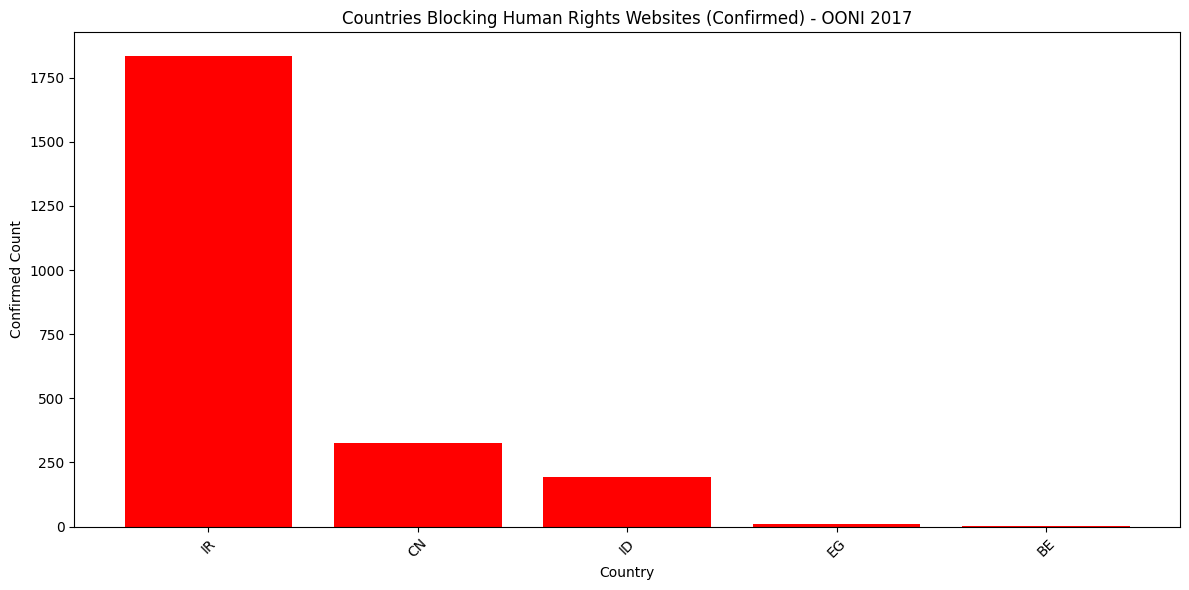

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(confirmed_df['probe_cc'], confirmed_df['confirmed_count'], color='red')
plt.title('Countries Blocking Human Rights Websites (Confirmed) - OONI 2017')
plt.xlabel('Country')
plt.ylabel('Confirmed Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()